In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
dist_df = pd.read_csv("bulk/reproducibility_genotypes_deseq2_limma_corr_pca_distances.tsv",sep="\t")

In [6]:
meta = pd.read_csv("bulk/reproducibility_genotypes_meta.tsv",sep="\t",index_col=0)

In [11]:
dist_df.head()

,Reproducibility_SC102A1_1_4,Reproducibility_SC102A1_1_9,Reproducibility_SC102A1_3_7,Reproducibility_SC102A1_2_12,Reproducibility_SC102A1_3_8,Reproducibility_SC102A1_3_6,Reproducibility_SC102A1_1_1,Reproducibility_SC102A1_2_9,Reproducibility_SC102A1_2_6,Reproducibility_SC102A1_2_1,...,Reproducibility_409B2_1_10,Reproducibility_409B2_3_5,Reproducibility_409B2_3_2,Reproducibility_409B2_3_10,Reproducibility_409B2_2_6,Reproducibility_409B2_2_9,Reproducibility_409B2_1_12,Reproducibility_409B2_1_11,Reproducibility_409B2_3_8,Reproducibility_409B2_2_10
Reproducibility_SC102A1_1_4,0.000000,103.403318,60.557347,94.007562,109.250251,111.713051,63.198715,107.472243,113.024984,65.220924,...,99.877222,54.720130,66.747366,99.451982,57.939866,110.792027,90.592541,98.658644,106.160892,100.061286
Reproducibility_SC102A1_1_9,103.403318,0.000000,92.673156,84.702058,51.124496,89.666521,114.490650,41.541696,90.585085,115.668331,...,67.476373,89.340353,86.802229,67.462256,90.912171,53.433054,73.120595,73.819867,69.140094,66.665874
Reproducibility_SC102A1_3_7,60.557347,92.673156,0.000000,82.686075,97.703871,102.790101,55.324769,97.024592,105.320703,58.110677,...,85.361165,59.205347,54.437557,85.299367,59.133345,99.887835,78.421381,85.870614,93.320044,85.448160
Reproducibility_SC102A1_2_12,94.007562,84.702058,82.686075,0.000000,83.854025,104.475055,97.386409,88.141610,105.542703,99.692684,...,77.399447,84.485887,78.755647,77.592806,84.556915,87.418932,57.664505,72.719586,80.091068,75.854895
Reproducibility_SC102A1_3_8,109.250251,51.124496,97.703871,83.854025,0.000000,97.982910,117.098851,56.256370,98.995307,119.012271,...,60.983836,95.559436,91.905150,61.403358,97.999719,45.264394,75.132475,68.219021,60.128144,57.995344


In [8]:
meta.head()

,genotype,repl,sample
Reproducibility_SC102A1_1_4,SC102A1,1,4
Reproducibility_SC102A1_1_9,SC102A1,1,9
Reproducibility_SC102A1_3_7,SC102A1,3,7
Reproducibility_SC102A1_2_12,SC102A1,2,12
Reproducibility_SC102A1_3_8,SC102A1,3,8


In [ ]:
#cluster samples in dendrogram?

In [12]:
distance_matrix = dist_df

In [14]:
import scipy.cluster.hierarchy as sch


In [15]:
# Convert the square distance matrix to condensed form
def square_to_condensed(square_matrix):
    # Ensure the matrix is square
    assert square_matrix.shape[0] == square_matrix.shape[1], "Distance matrix must be square"
    # Use the upper triangle indices to extract the condensed form
    triu_indices = np.triu_indices(square_matrix.shape[0], k=1)
    condensed_matrix = square_matrix[triu_indices]
    return condensed_matrix

condensed_distance_matrix = square_to_condensed(distance_matrix.values)

# Perform hierarchical clustering using the condensed distance matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')


In [136]:
vsd = pd.read_csv("bulk/reproducibility_genotypes_deseq2_vsd.tsv",sep="\t",index_col=0)

In [182]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

#set colors
colors = [
    'red',
    'green',
    'blue',
    'cyan',
    'magenta',
    'gold',
    'black',
    'lightblue',
    'orange',
    'purple',
    'brown',
    'pink'
]

leaf_colors = {}
for sample,color in zip(list(set(meta['sample'])),colors):
    sample_samples = list(meta.loc[meta['sample']==sample].index)
    for ss in sample_samples:
        leaf_colors[ss] = color


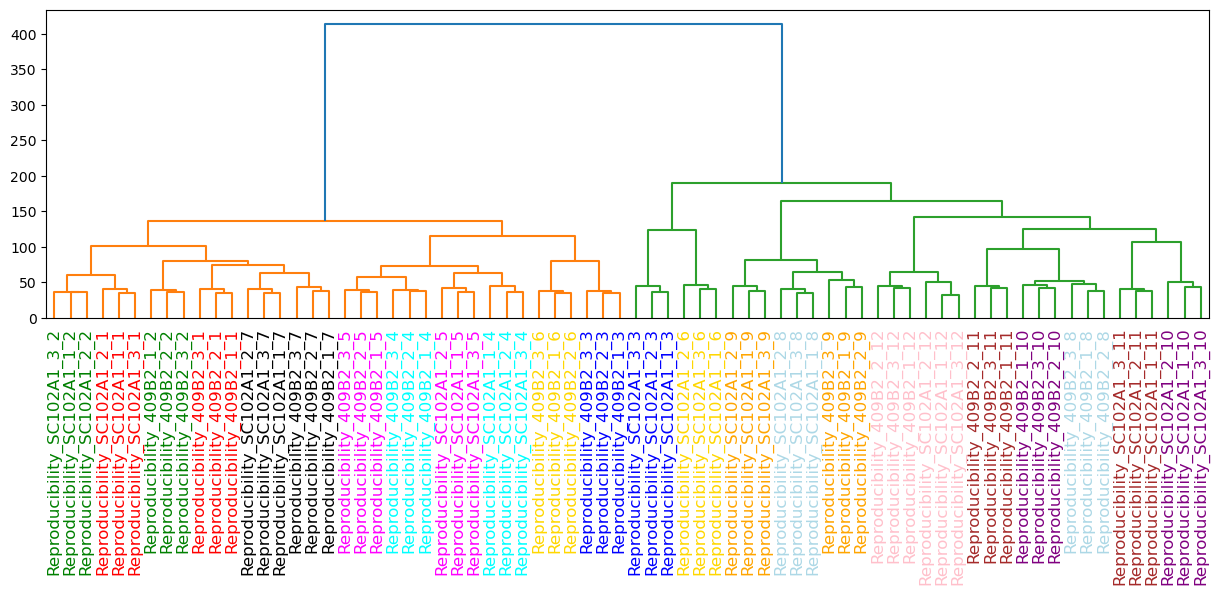

In [183]:
plt.figure(figsize=(15,4))
# Create the dendrogram with custom leaf label colors
dendrogram = sch.dendrogram(
    linkage_matrix,
    labels=df.index,
    leaf_rotation=90,  # Rotate leaf labels for better readability
    leaf_font_size=12  # Font size for leaf labels
)

# Manually color the leaves
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()

dendrogram_labels = []
for label in x_labels:
    txt = label.get_text()
    color_code = leaf_colors[txt]
    label.set_color(color_code)
    dendrogram_labels.append(txt)

#plt.savefig("stability_plots/dendrogram_colored_by_sample.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


In [68]:
sc_markers_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/marker_genes/iGlut_post_dr_clustered_raw_merged_markers.tsv",sep="\t",index_col=0)
sc_markers_post.head()

sc_meta_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/iGlut_post_dr_clustered_raw_merged_meta.tsv",sep="\t",index_col=0)
sc_meta_post.head()

,sample,species,gene_count,tscp_count,mread_count,bc1_well,bc2_well,bc3_well,bc1_wind,bc2_wind,...,M_CHIR,M_RA,M_FGF8,M_BMP4,M_SHH,M_PM,tSNE_1,tSNE_2,umap_1,umap_2
01_01_02__s1,iGlut_post_p1,hg38,3542,9141,11365,A1,A1,A2,1,1,...,0.0,0,0,50,0,0,0.542512,39.629030,-1.988116,7.912624
01_01_12__s1,iGlut_post_p1,hg38,1176,1940,2390,A1,A1,A12,1,1,...,0.0,0,0,50,0,0,6.332805,39.521160,-3.288275,8.063947
01_01_16__s1,iGlut_post_p1,hg38,3393,8576,10612,A1,A1,B4,1,1,...,0.0,0,0,50,0,0,28.295320,26.426134,-1.621965,-1.320243
01_01_22__s1,iGlut_post_p1,hg38,2650,5700,7061,A1,A1,B10,1,1,...,0.0,0,0,50,0,0,42.816700,21.352268,-1.820428,-2.448944
01_01_55__s1,iGlut_post_p1,hg38,1970,3873,4844,A1,A1,E7,1,1,...,0.0,0,0,50,0,0,19.640999,-2.478396,3.294251,-1.841123


In [171]:
sc_markers_pre = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/marker_genes/iGlut_pre_dr_clustered_raw_merged_markers.tsv",sep="\t",index_col=0)
sc_markers_pre.head()

sc_meta_pre = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/iGlut_pre_dr_clustered_raw_merged_meta_fixed.tsv",sep="\t",index_col=0)
sc_meta_pre.head()

,sample,species,gene_count,tscp_count,mread_count,bc1_well,bc2_well,bc3_well,bc1_wind,bc2_wind,...,M_CHIR,M_RA,M_FGF8,M_BMP4,M_SHH,M_PM,tSNE_1,tSNE_2,umap_1,umap_2
01_01_41__s1,iGlut_pre,hg38,1456,2184,2946,A1,A1,D5,1,1,...,0.0,0,0,50,0,0,10.189884,39.231434,13.276781,-0.856798
01_01_68__s1,iGlut_pre,hg38,1693,2776,3762,A1,A1,F8,1,1,...,0.0,0,0,50,0,0,25.132082,32.402280,14.830362,5.908925
01_01_76__s1,iGlut_pre,hg38,1454,2196,2981,A1,A1,G4,1,1,...,0.0,0,0,50,0,0,5.797632,52.208040,16.393394,-1.702099
01_01_83__s1,iGlut_pre,hg38,2391,4048,5592,A1,A1,G11,1,1,...,0.0,0,0,50,0,0,6.855360,43.492870,13.618956,-2.668232
01_01_92__s1,iGlut_pre,hg38,769,1076,1503,A1,A1,H8,1,1,...,0.0,0,0,50,0,0,25.081343,29.805347,14.698254,5.868345


In [172]:
import seaborn as sns

In [173]:
meta_sorted = meta.sort_values(by=['genotype','sample'])
samples = list(set(meta_sorted['sample']))
samples = [str(x) for x in samples]

In [174]:
sample2ID = {
    '1': 'p1_D4',
    '2': 'p1_D8',
    '3': 'p1_D10',
    '4': 'p1_B4',
    '5': 'p1_B8',
    '6': 'p1_B10',
    '7': 'p3_C2',
    '8': 'p3_F2',
    '9': 'p3_D1',
    '10': 'p3_F4',
    '11': 'p3_G1',
    '12': 'p3_G10'}


In [175]:
all_markers_plot = []
all_markers_plot_post = []
all_markers_plot_pre = []
for sample in samples:
    sample_ID = sample2ID[sample]
    if 'p1' in sample_ID:
        sample_clusters = list(sc_meta_post.loc[sc_meta_post['parse_id']==sample_ID,'final_clustering'].value_counts().head(n=3).index)

        for cluster in sample_clusters:
            cluster_markers = list(sc_markers_post.loc[sc_markers_post['cluster_old']==cluster].index[0:10])
            all_markers_plot = all_markers_plot + cluster_markers
            all_markers_plot_post = all_markers_plot_post + cluster_markers            
    if 'p3' in sample_ID:
        sample_clusters = list(sc_meta_pre.loc[sc_meta_pre['parse_id']==sample_ID,'final_clustering'].value_counts().head(n=3).index)
        for cluster in sample_clusters:
            cluster_markers = list(sc_markers_pre.loc[sc_markers_pre['cluster']==cluster].index[0:10])
            all_markers_plot = all_markers_plot + cluster_markers
            all_markers_plot_pre = all_markers_plot_pre + cluster_markers

In [176]:
sc_markers_pre

,scores,pvals,pvals_adj,logfoldchanges,cluster,fcluster,cluster_old
BOC,69.443950,0.0,0.0,2.953943,0,0,0
MIR99AHG,60.817980,0.0,0.0,2.048046,0,0,0
HOXD3,60.788260,0.0,0.0,4.283298,0,0,0
RFX4,54.793470,0.0,0.0,2.647338,0,0,0
PRTG,54.129130,0.0,0.0,1.525106,0,0,0
...,...,...,...,...,...,...,...
SDK1,-42.162025,0.0,0.0,-1.438273,114,114,114
FAT3,-43.148895,0.0,0.0,-1.386530,114,114,114
GPC6,-44.435505,0.0,0.0,-1.201998,114,114,114
EGFEM1P,-46.812770,0.0,0.0,-1.773386,114,114,114


In [177]:
all_markers_plot = [x for x in all_markers_plot if x in vsd.index]

In [178]:
len(all_markers_plot)

357

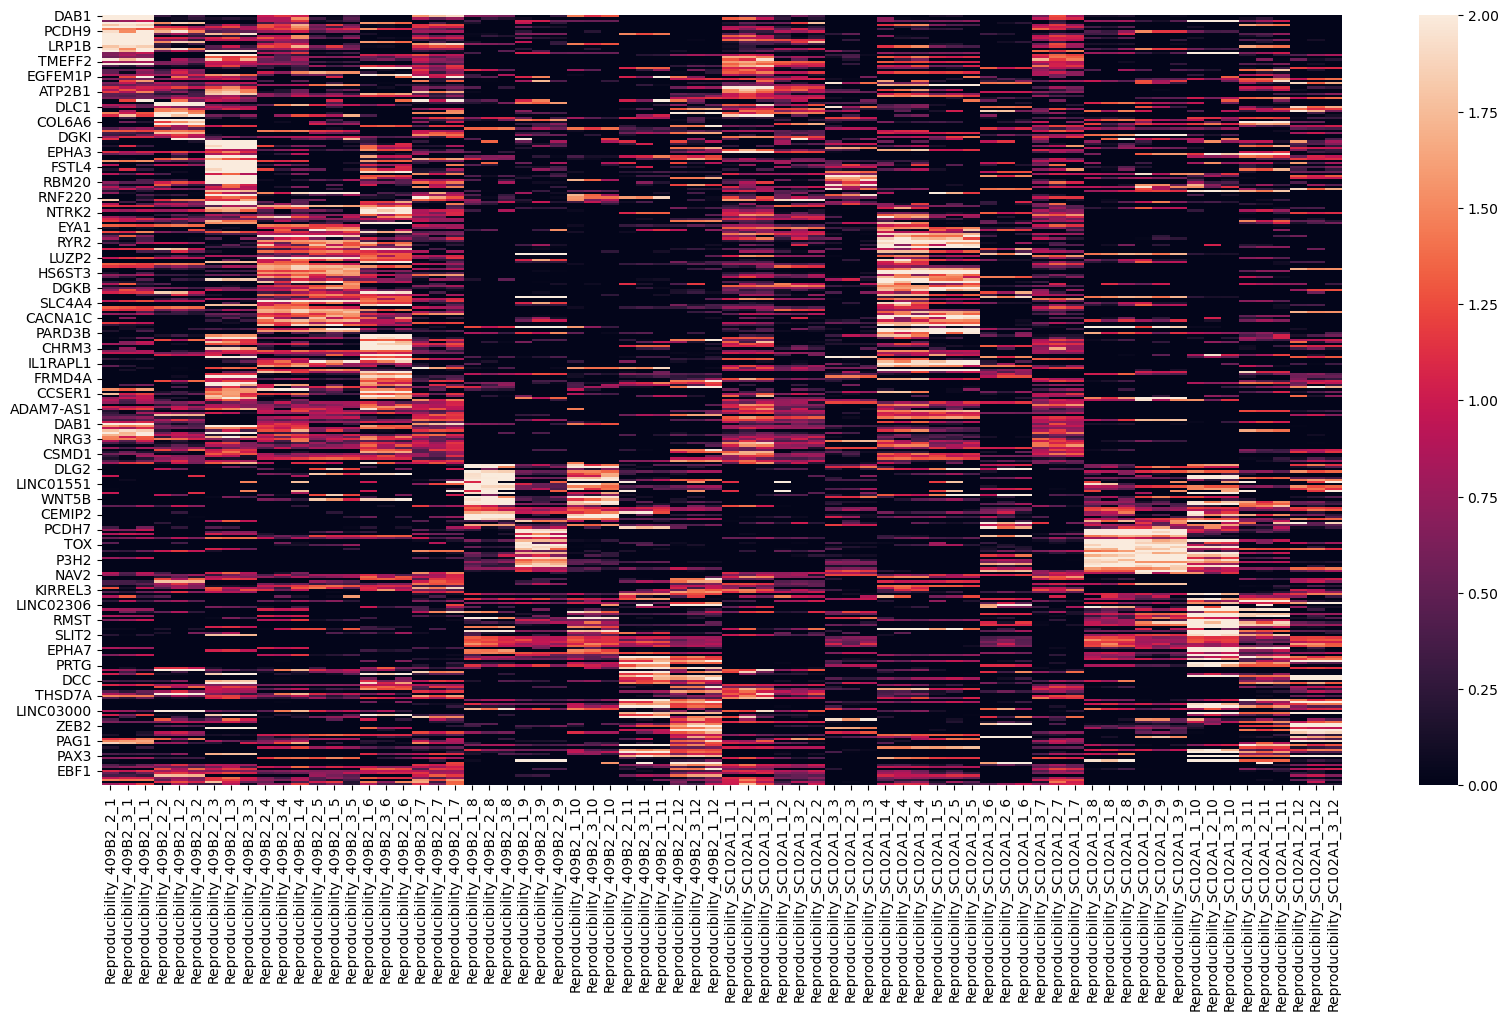

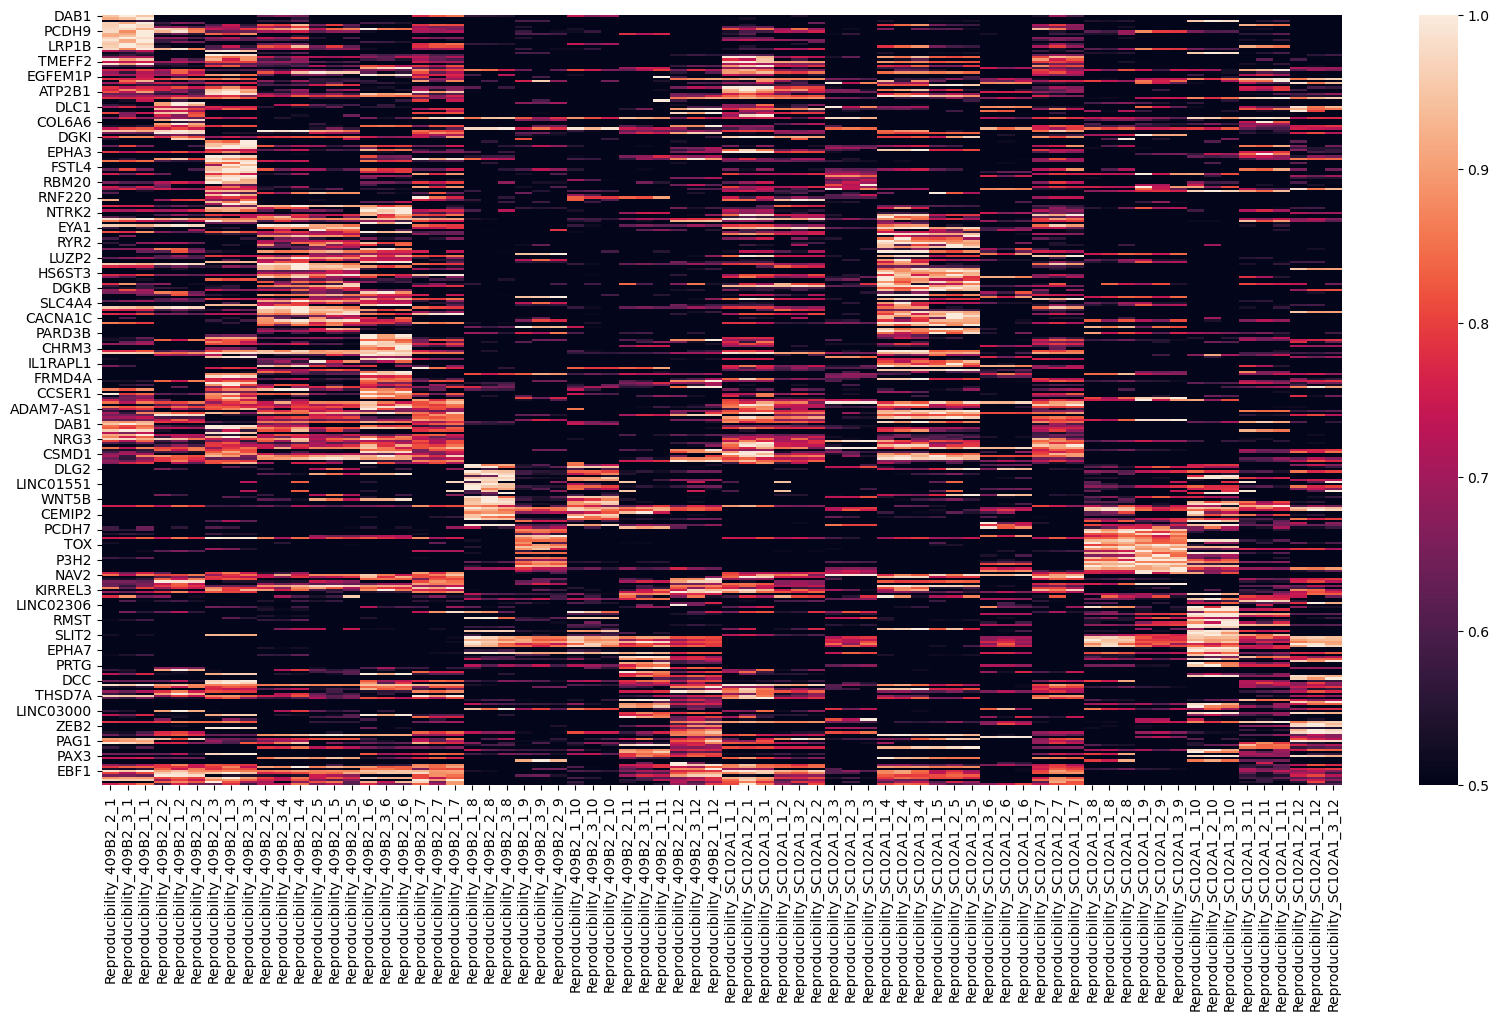

In [179]:
sample_markers_all = all_markers_plot
dendrogram_labels = meta_sorted.index

vsd_plot = vsd.loc[sample_markers_all,dendrogram_labels]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()

plt.figure(figsize=(20,10))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
plt.show()
plt.close()

vsd_plot_minmax = (vsd_plot.T-vsd_plot.T.min())/(vsd_plot.T.max()-vsd_plot.T.min())
vsd_plot_minmax = vsd_plot_minmax.T
plt.figure(figsize=(20,10))
sns.heatmap(vsd_plot_minmax,vmin=0.5,vmax=1)
plt.show()
plt.close()

SC102A1


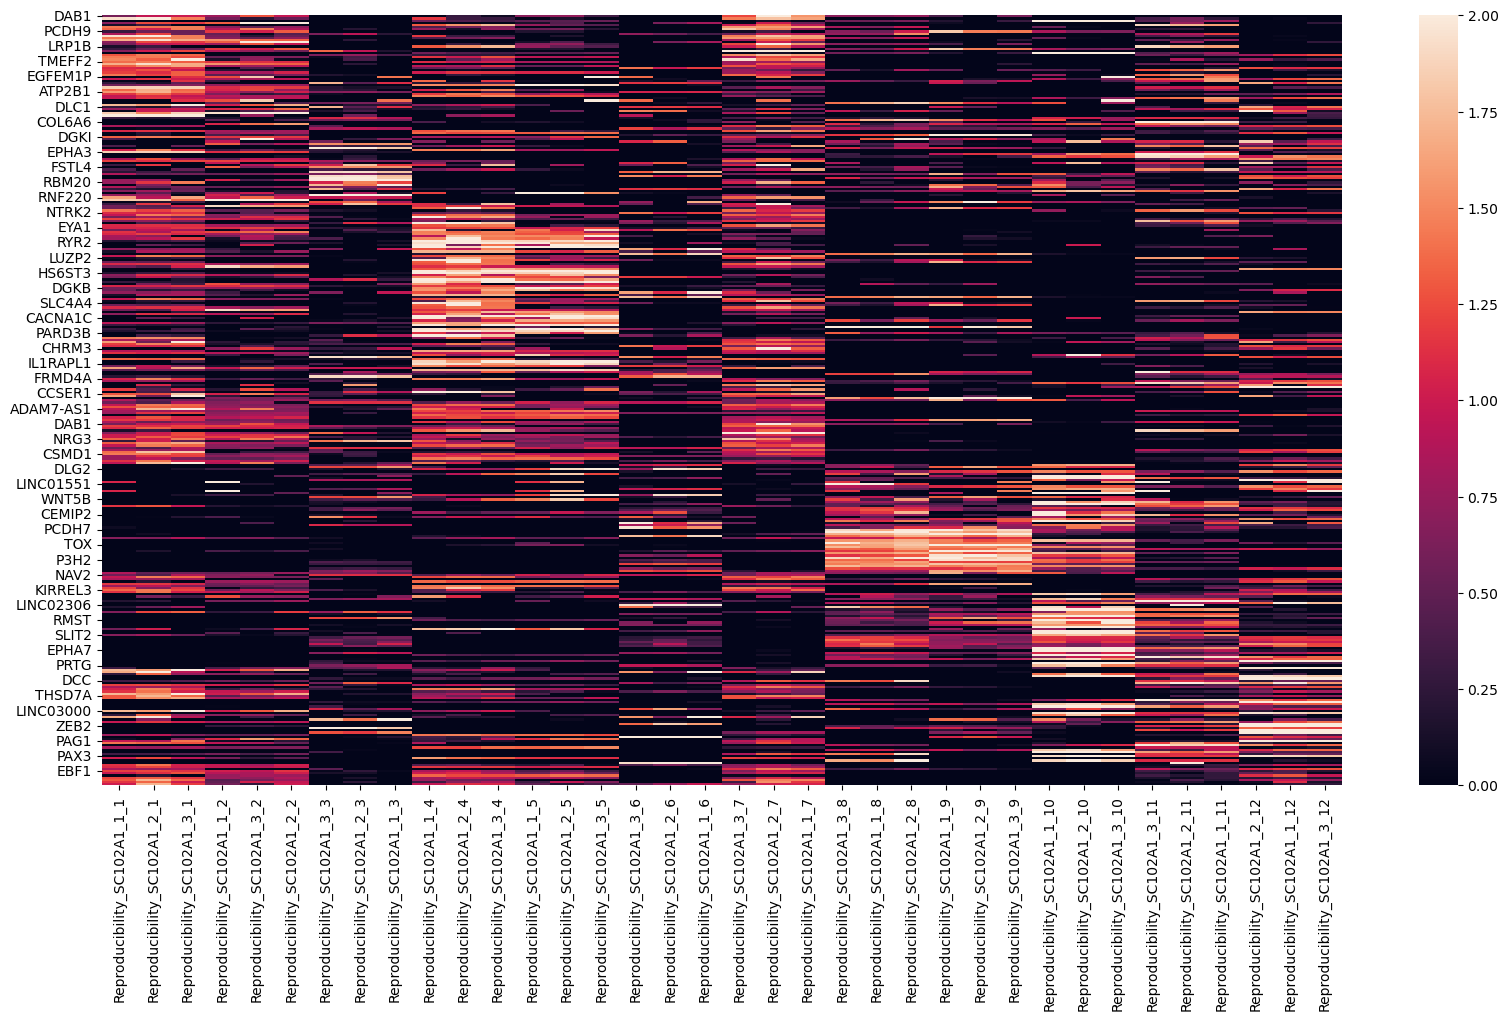

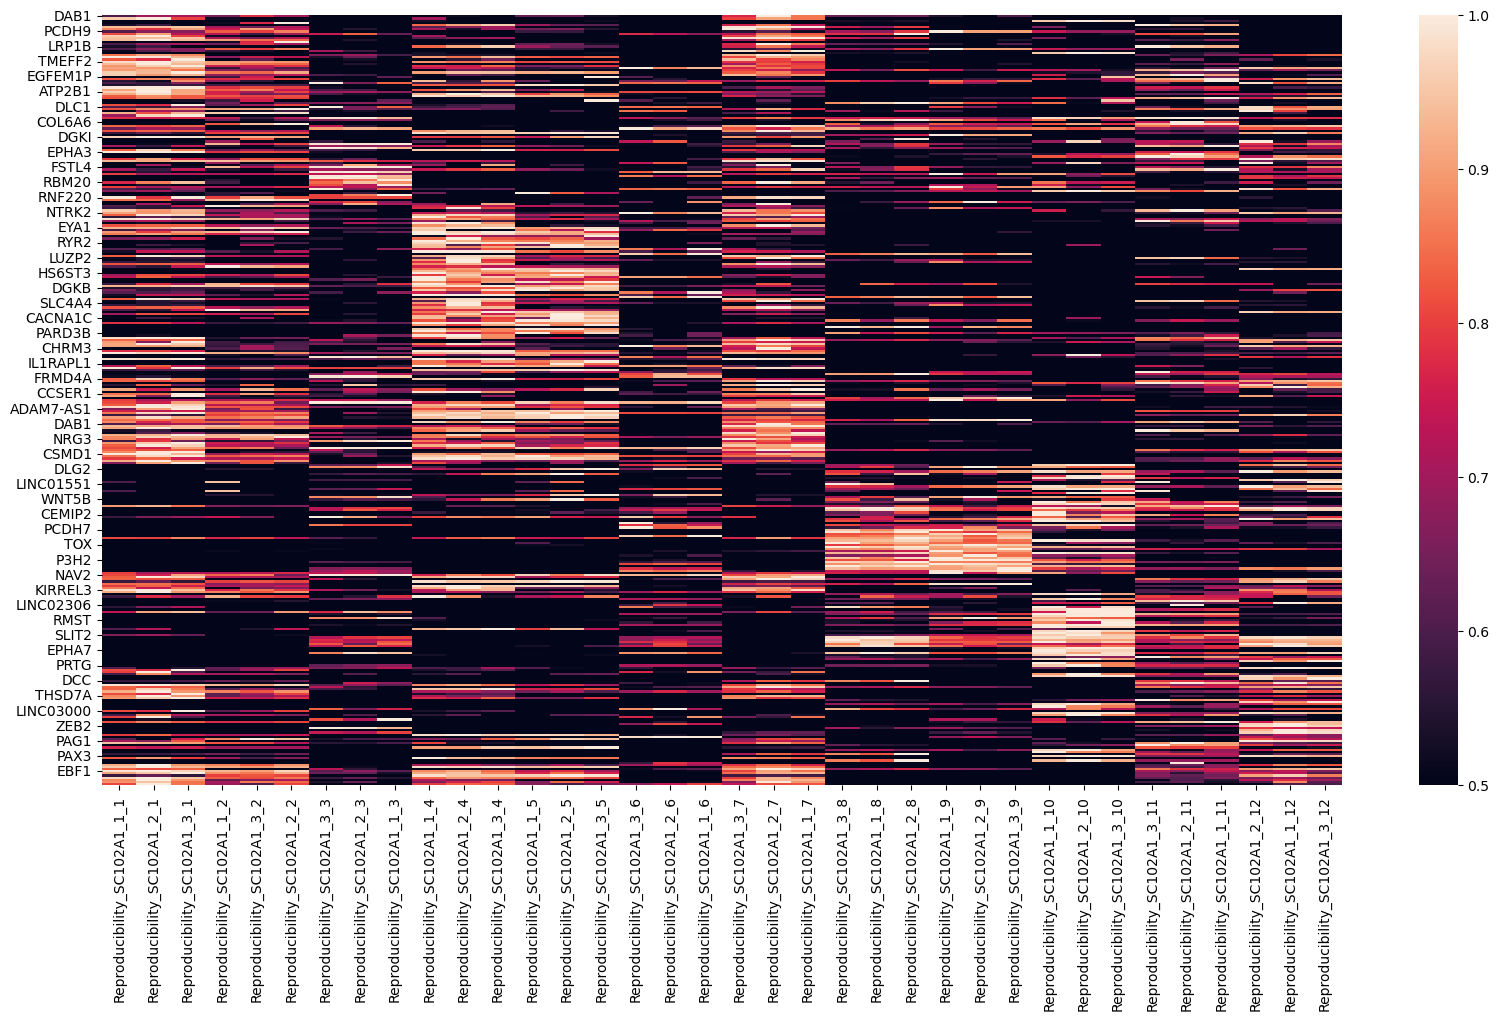

409B2


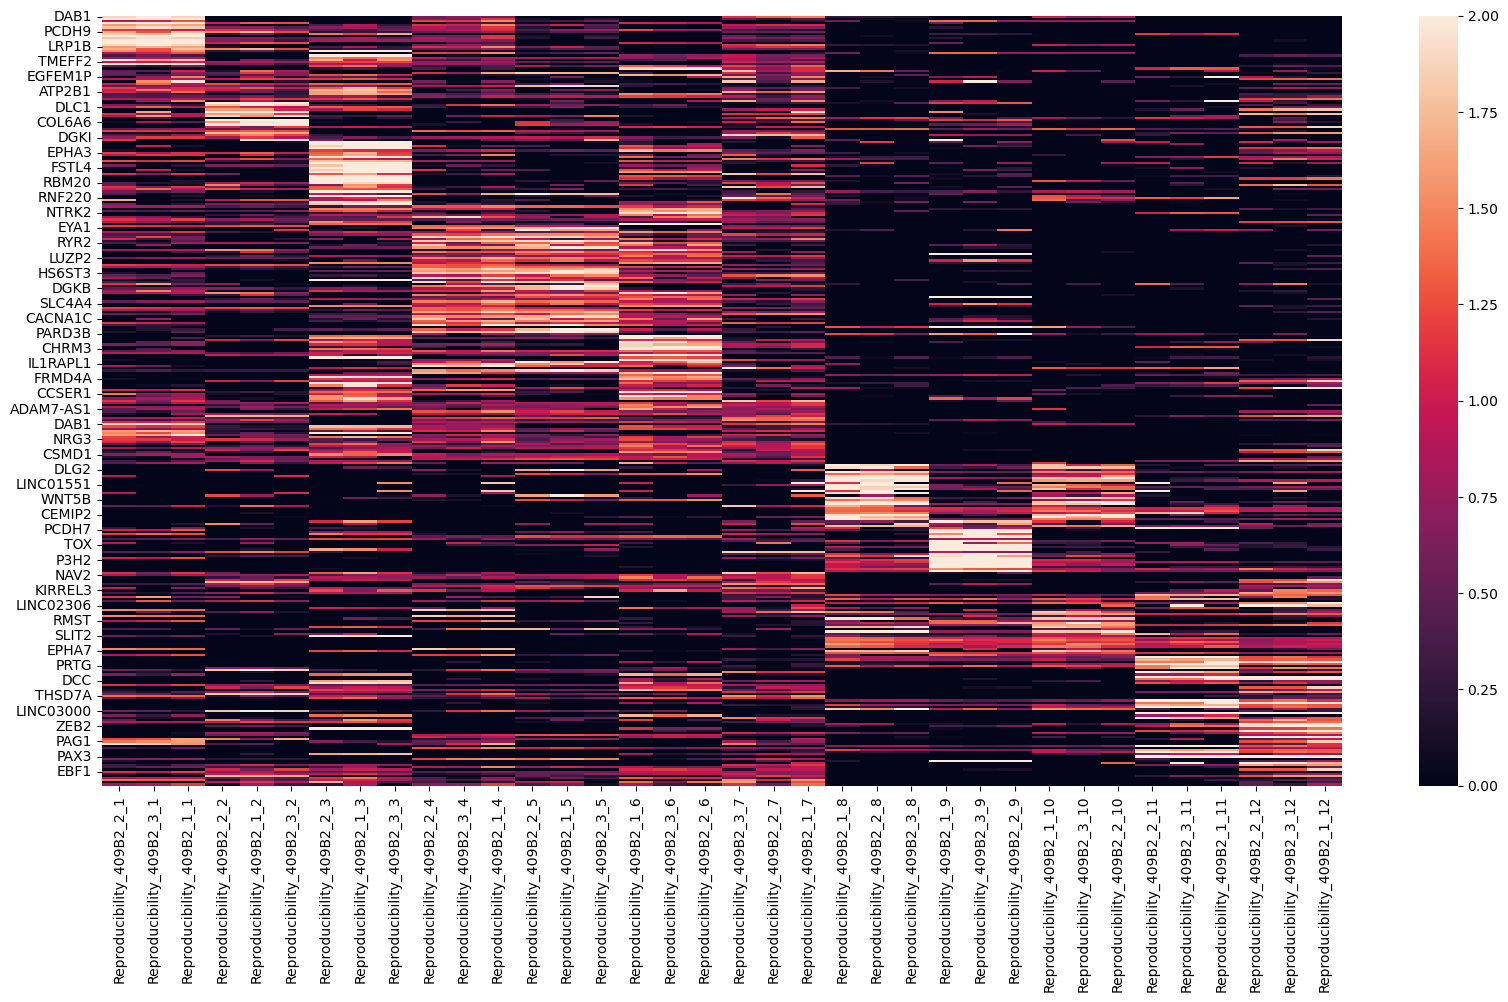

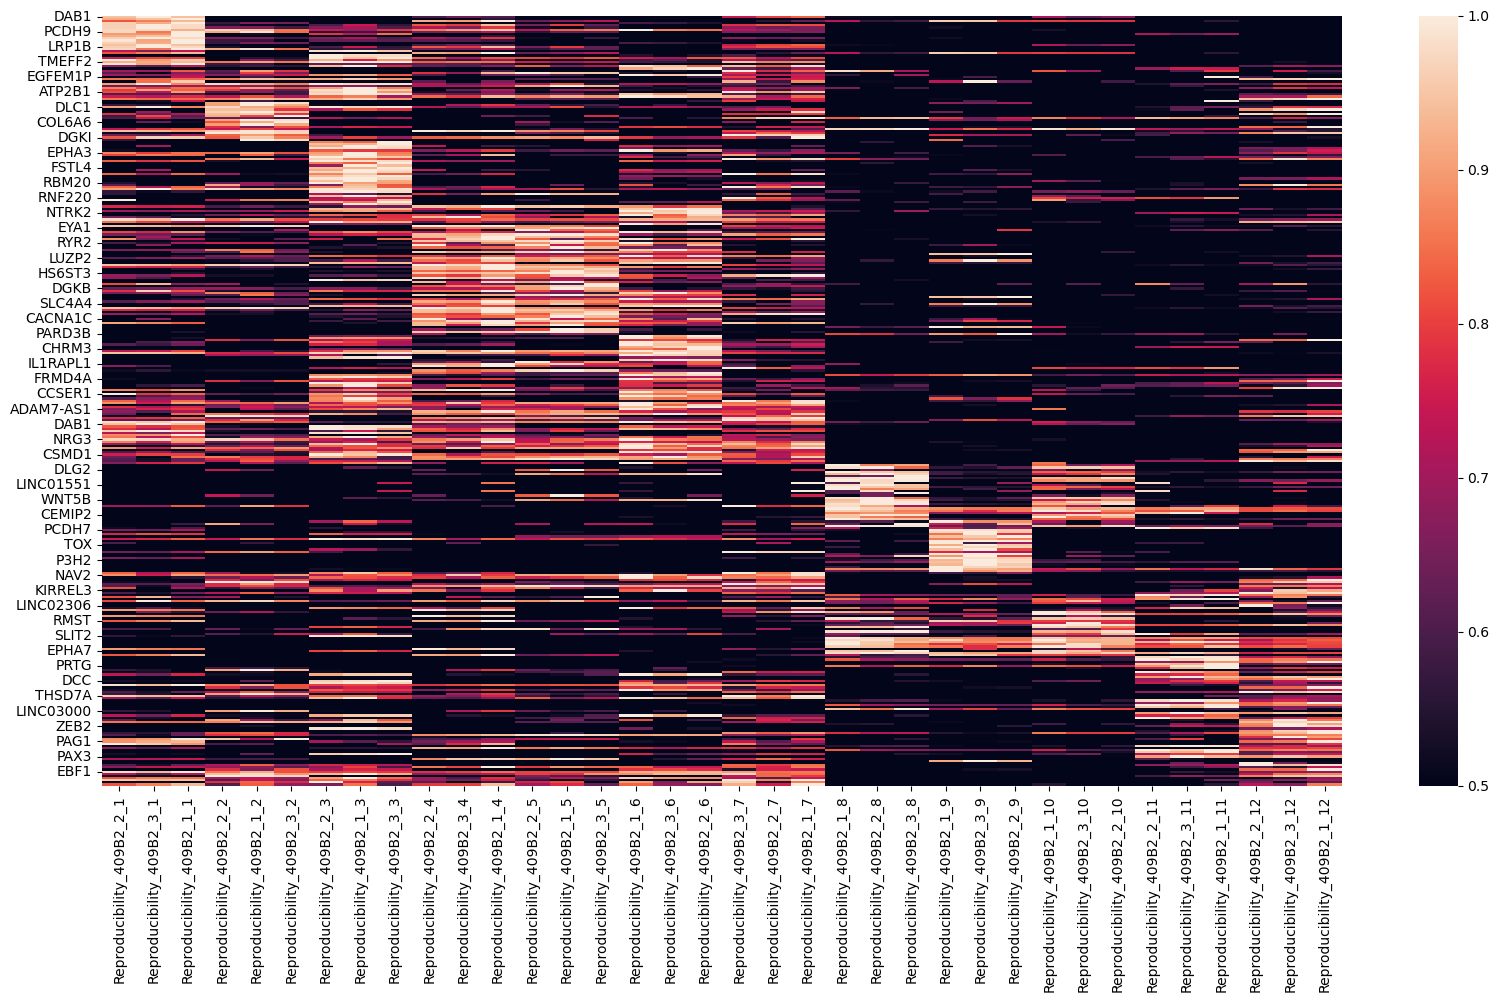

In [181]:
for genotype in set(meta_sorted['genotype']):
    print(genotype)
    genotype_samples = list(meta_sorted.loc[meta_sorted['genotype']==genotype].index)
    dendrogram_labels = genotype_samples
    sample_markers_all = all_markers_plot

    vsd_plot = vsd.loc[sample_markers_all,dendrogram_labels]
    vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()

    plt.figure(figsize=(20,10))
    sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
    plt.show()
    plt.close()

    vsd_plot_minmax = (vsd_plot.T-vsd_plot.T.min())/(vsd_plot.T.max()-vsd_plot.T.min())
    vsd_plot_minmax = vsd_plot_minmax.T

    plt.figure(figsize=(20,10))
    sns.heatmap(vsd_plot_minmax,vmin=0.5,vmax=1)
    plt.show()
    plt.close()

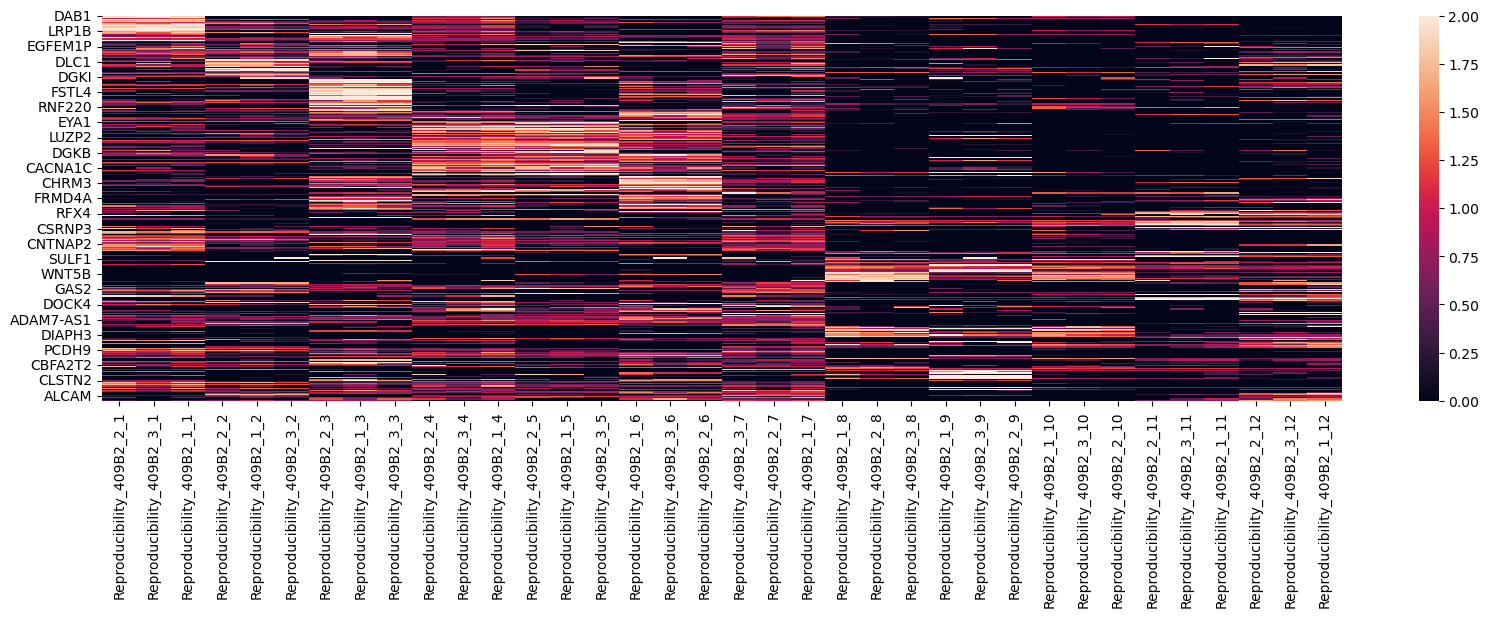

In [22]:
vsd_plot = vsd.loc[sample_markers_all,dendrogram_labels]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()


NameError: name 'sample_markers_all' is not defined

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
plt.savefig("stability_plots/dendrogram_colored_by_sample_heatmap_markers.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


In [ ]:
all_samples = dist_df.index
import re
all_samples = [re.sub(".*_","",x) for x in all_samples]

from collections import Counter
tmp = Counter(all_samples)
matching_samples = []
for x in tmp:
    if tmp[x]>1:
        matching_samples.append(x)

dist_matching = []
for sample1 in matching_samples:
    for sample2 in matching_samples:
        dm = dist_df.loc['iGlut_pre_'+sample1,'iGABA_pre_'+sample2]
        dist_matching.append(dict(sample1=sample1,sample2=sample2,d=dm))

dist_matching = pd.DataFrame(dist_matching)

dms = list(dist_matching.loc[dist_matching['sample1']==dist_matching['sample2'],'d'])
dds = list(dist_matching.loc[dist_matching['sample1']!=dist_matching['sample2'],'d'])

dist_matching.loc[dist_matching['sample1']==dist_matching['sample2'],'matching'] = 1
dist_matching.loc[dist_matching['sample1']!=dist_matching['sample2'],'matching'] = 0

import seaborn as sns
sns.boxplot(x='matching',y='d',data=dist_matching)